## Introduction to Principal Component Analysis

In [1]:
import numpy as np

in_dir = "data/"
txt_name = "irisdata.txt"
iris_data = np.loadtxt(in_dir + txt_name, comments="%")
# x is a matrix with 50 rows and 4 columns
x = iris_data[0:50, 0:4]

# Check matric dimensions
n_feat = x.shape[1]   # columns
n_obs = x.shape[0]    # rows
print(f"Number of features: {n_feat} and number of observations: {n_obs}")

x

Number of features: 4 and number of observations: 50


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [2]:
sep_l = x[:, 0]
sep_w = x[:, 1]
pet_l = x[:, 2]
pet_w = x[:, 3]

# Use ddof = 1 to make an unbiased estimate (divides by N-1)
var_sep_l = sep_l.var(ddof=1)
var_sep_w = sep_w.var(ddof=1)
var_pet_l = pet_l.var(ddof=1)
var_pet_w = pet_w.var(ddof=1)

In [3]:
sep_l

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

In [4]:
# Calculate covariance using formula

cov_x = np.zeros([50,4])
cov_mat = np.zeros([6])

# subtract mean of variable from each data point
for i in range(n_feat):
    cov_x[:, i] = x[:, i] - np.mean(x,0)[i]

for i in range(n_obs):    
    cov_mat[0] += cov_x[i, 0]*cov_x[i, 1]
    cov_mat[1] += cov_x[i, 0]*cov_x[i, 2]
    cov_mat[2] += cov_x[i, 0]*cov_x[i, 3]
    cov_mat[3] += cov_x[i, 1]*cov_x[i, 2]
    cov_mat[4] += cov_x[i, 1]*cov_x[i, 3]
    cov_mat[5] += cov_x[i, 2]*cov_x[i, 3]

for i in range(6):
    cov_mat[i] = cov_mat[i]/(n_obs-1)

print("cov sep_1 sep_w: ", cov_mat[0])
print("cov sep_1 pet_l: ", cov_mat[1])
print("cov sep_1 pet_w: ", cov_mat[2])
print("cov sep_w pet_l: ", cov_mat[3])
print("cov sep_w pet_w: ", cov_mat[4])
print("cov pet_1 pet_w: ", cov_mat[5])    


print("\nvar sep_l: ", var_sep_l)
print("var sep_w: ", var_sep_w)
print("var pet_l: ", var_pet_l)
print("var pet_l: ", var_pet_w)

covariance = np.cov(x.transpose())
print("\n Using numpy covariance: \n", covariance)

# Covariance values lie between -1 to 1

cov sep_1 sep_w:  0.09921632653061219
cov sep_1 pet_l:  0.01635510204081632
cov sep_1 pet_w:  0.01033061224489795
cov sep_w pet_l:  0.01169795918367346
cov sep_w pet_w:  0.009297959183673474
cov pet_1 pet_w:  0.006069387755102041

var sep_l:  0.12424897959183677
var sep_w:  0.1436897959183674
var pet_l:  0.030159183673469384
var pet_l:  0.01110612244897959

 Using numpy covariance: 
 [[0.12424898 0.09921633 0.0163551  0.01033061]
 [0.09921633 0.1436898  0.01169796 0.00929796]
 [0.0163551  0.01169796 0.03015918 0.00606939]
 [0.01033061 0.00929796 0.00606939 0.01110612]]


<Figure size 640x480 with 0 Axes>

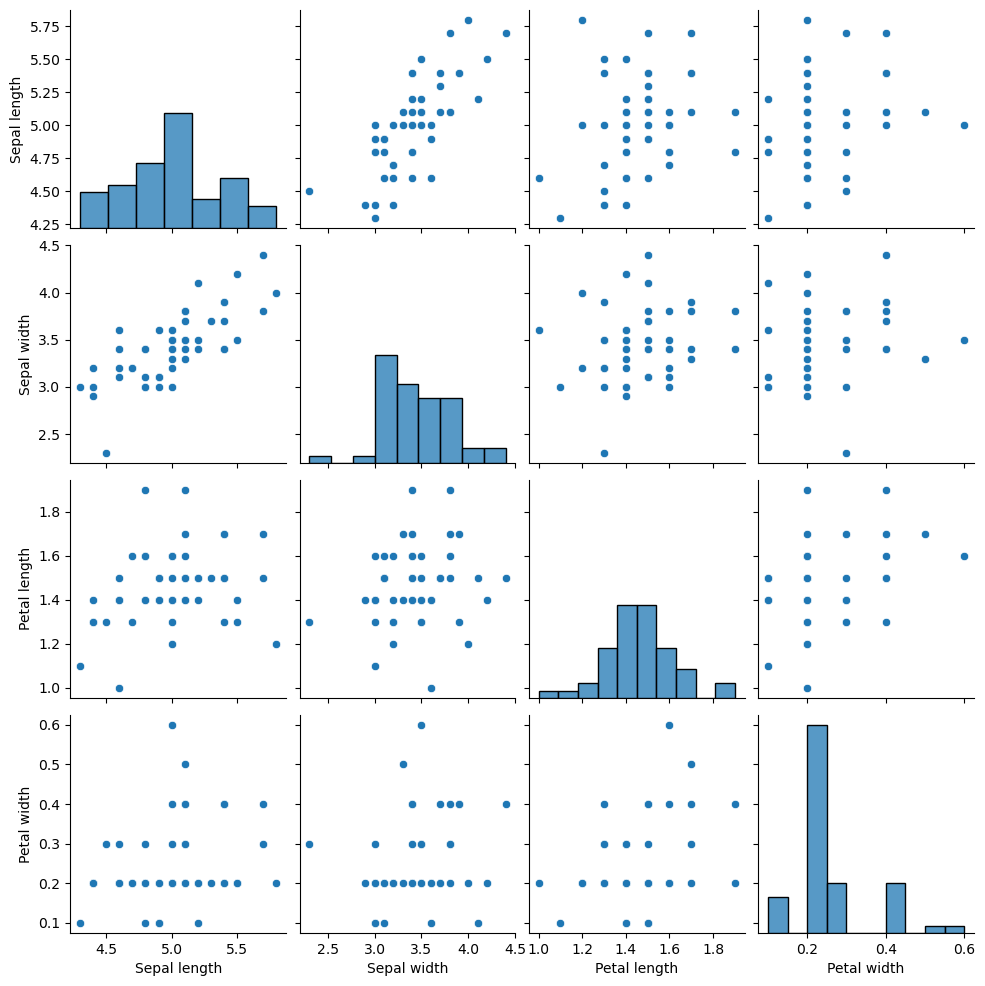

(50, 4)

In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(x, columns=['Sepal length', 'Sepal width',
							 'Petal length', 'Petal width'])
sns.pairplot(d)
plt.show()
x.shape

# Sepal length and sepal width are related 
# because the covariance value is pretty high

In [6]:
# Breakdown of PCA Analaysis using several steps
mn = np.mean(x, axis=0)
data = x - mn

c_x = 1/(n_obs-1)*np.matmul(data.transpose(),data)
print("Cx: \n", c_x)
print("np.cov: \n", covariance)

Cx: 
 [[0.12424898 0.09921633 0.0163551  0.01033061]
 [0.09921633 0.1436898  0.01169796 0.00929796]
 [0.0163551  0.01169796 0.03015918 0.00606939]
 [0.01033061 0.00929796 0.00606939 0.01110612]]
np.cov: 
 [[0.12424898 0.09921633 0.0163551  0.01033061]
 [0.09921633 0.1436898  0.01169796 0.00929796]
 [0.0163551  0.01169796 0.03015918 0.00606939]
 [0.01033061 0.00929796 0.00606939 0.01110612]]


v_norm:  [76.47237023 11.93992401  8.66624997  2.92145579]


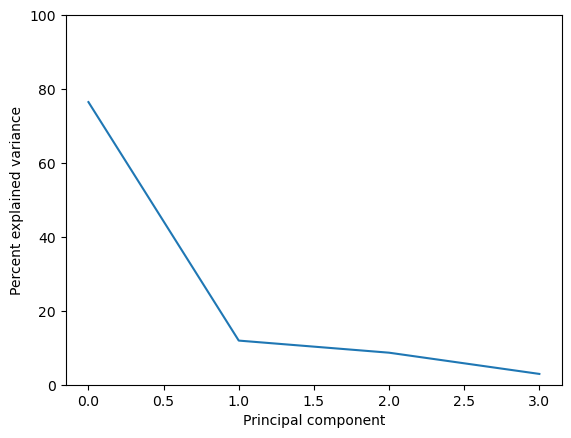

In [7]:
values, vectors = np.linalg.eig(c_x) # Here c_x is your covariance matrix.

v_norm = values / values.sum() * 100
print("v_norm: ", v_norm)
plt.plot(v_norm)
plt.xlabel('Principal component')
plt.ylabel('Percent explained variance')
plt.ylim([0, 100])

plt.show()

# The first feature explains 76% of the total variation

In [8]:
# Project data onto PCA space using dot-product
pc_proj = vectors.T.dot(data.T)
pc_proj.shape
# pc_proj.transpose()

(4, 50)

<Figure size 640x480 with 0 Axes>

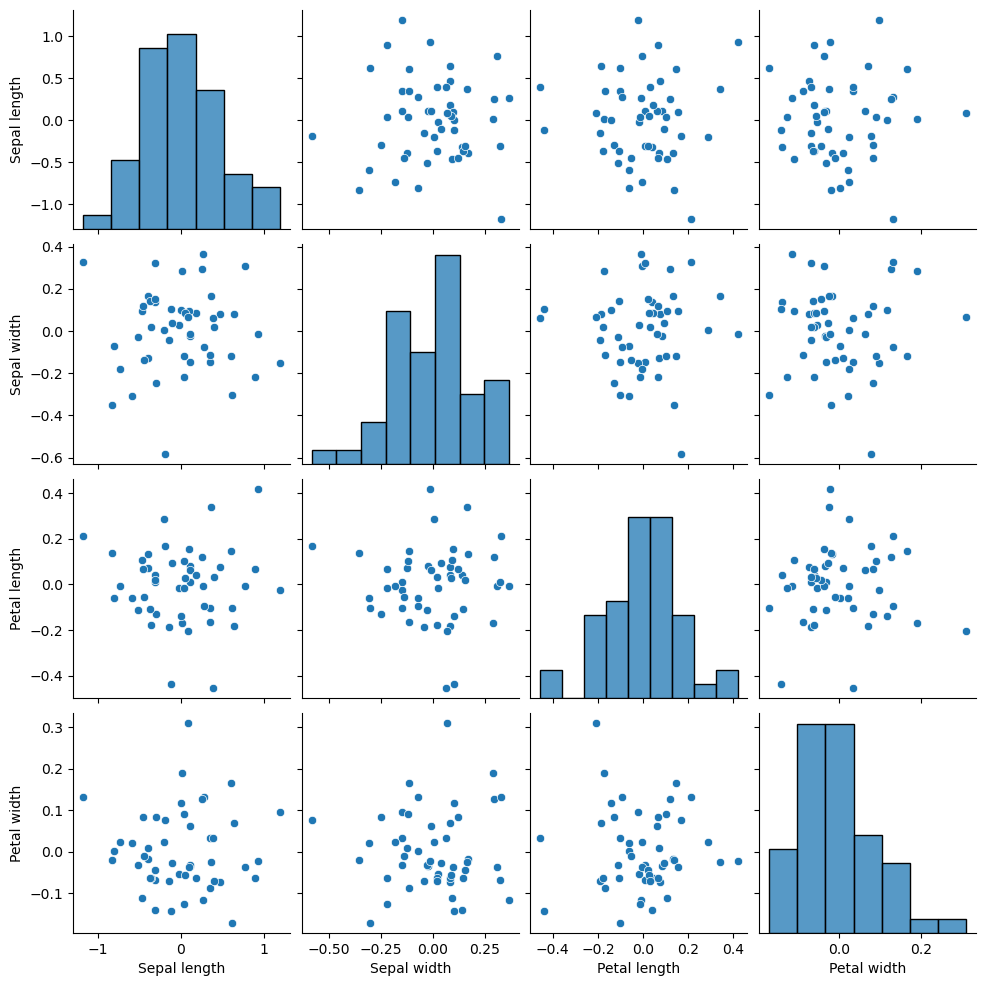

In [9]:
# Using seaborns pairplot with projected data
plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(pc_proj.transpose(), 
                 columns=['Sepal length', 'Sepal width',
                          'Petal length', 'Petal width'])
sns.pairplot(d)
plt.show()

In [12]:
# Direct PCA using the decompositions functions

from sklearn import decomposition

pca = decomposition.PCA()
pca.fit(x)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
vectors_pca = pca.components_

data_transform = pca.transform(data)
print("shape: ", data_transform.shape)

covariance = np.cov(x.transpose())
print("\n Using numpy covariance: \n", covariance)

shape:  (50, 4)

 Using numpy covariance: 
 [[0.12424898 0.09921633 0.0163551  0.01033061]
 [0.09921633 0.1436898  0.01169796 0.00929796]
 [0.0163551  0.01169796 0.03015918 0.00606939]
 [0.01033061 0.00929796 0.00606939 0.01110612]]


In [ ]:
# Using seaborns pairplot with projected data
plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(data_transform, 
                 columns=['Sepal length', 'Sepal width',
                          'Petal length', 'Petal width'])
sns.pairplot(d)
plt.show()